# CLustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fruits = np.load('data/fruits_300.npy')

In [28]:
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [6]:
fruits.shape # (300, 100, 100) : (샘플개수, 이미지높이, 이미지너비)

(300, 100, 100)

In [8]:
fruits[0] #첫번째 사진

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(100, 100), dtype=uint8)

In [18]:
fruits[0,50] #첫번째 사진의 50번째 줄

array([  5,   1,   1,   3,   2,  45,  84,  78,  76,  74,  76,  75,  74,
        75,  72,  67,  65,  65,  64,  63,  62,  60,  59,  62,  58,  55,
        54,  54,  53,  52,  50,  49,  51,  52,  53,  53,  54,  56,  59,
        62,  65,  67,  71,  74,  76,  79,  83,  86,  90,  94,  97,  99,
       102, 105, 108, 112, 115, 120, 124, 127, 133, 138, 143, 149, 155,
       156, 157, 162, 170, 174, 175, 176, 181, 187, 194, 201, 204, 206,
       210, 216, 222, 225, 228, 232, 234, 236, 237, 237, 237, 235, 237,
       238, 234, 229, 114,   1,   1,   1,   1,   1], dtype=uint8)

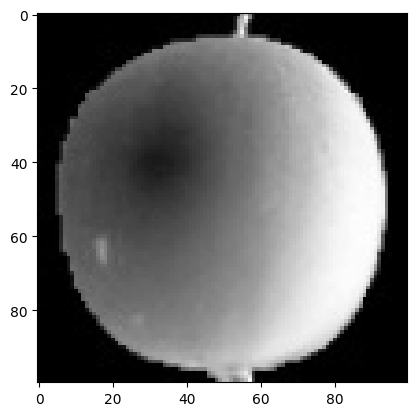

In [22]:
plt.imshow(fruits[0], cmap= 'gray')
plt.show()
# 밝은색 : 높은값, 어두운색 : 낮은값 => 바탕이 아닌 사과가 중요하므로 바탕을 검은색으로 만든다

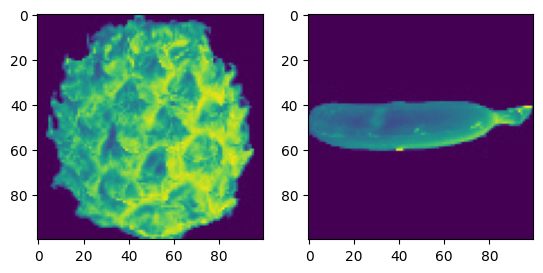

In [23]:
fig, axs =plt.subplots(1,2)
axs[0].imshow(fruits[100])
axs[1].imshow(fruits[200])
plt.show()

In [26]:
#fruits[0:100].shape() => (100,100,100)
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [29]:
apple.shape

(100, 10000)

In [30]:
apple.mean(axis=1) #axis=1 : 열 방향(가로)로 계산

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

<function matplotlib.pyplot.show(close=None, block=None)>

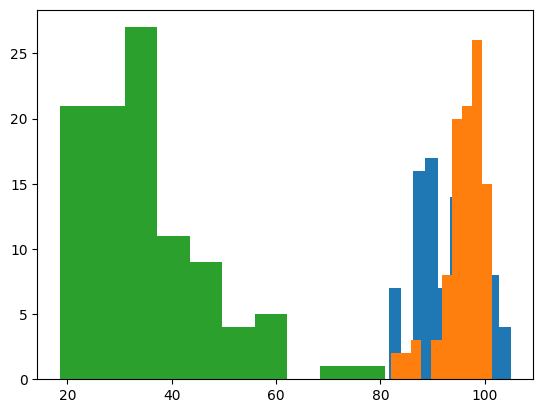

In [32]:
plt.hist(np.mean(apple, axis = 1))
plt.hist(np.mean(pineapple, axis=1))
plt.hist(np.mean(banana, axis=1))
plt.show

In [34]:
apple_mean = np.mean(apple, axis=0).reshape(100,100) #reshape(100,100) 
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

In [44]:
# 절댓값 계산
abs_diff = np.abs(fruits - banana_mean)
#print(abs_diff)
abs_mean= np.mean(abs_diff, axis=(1,2)) # abs_diff는 (300,100,100)의 배열, 평균을 구하기 위해 axis=1, axis=2 가 필요

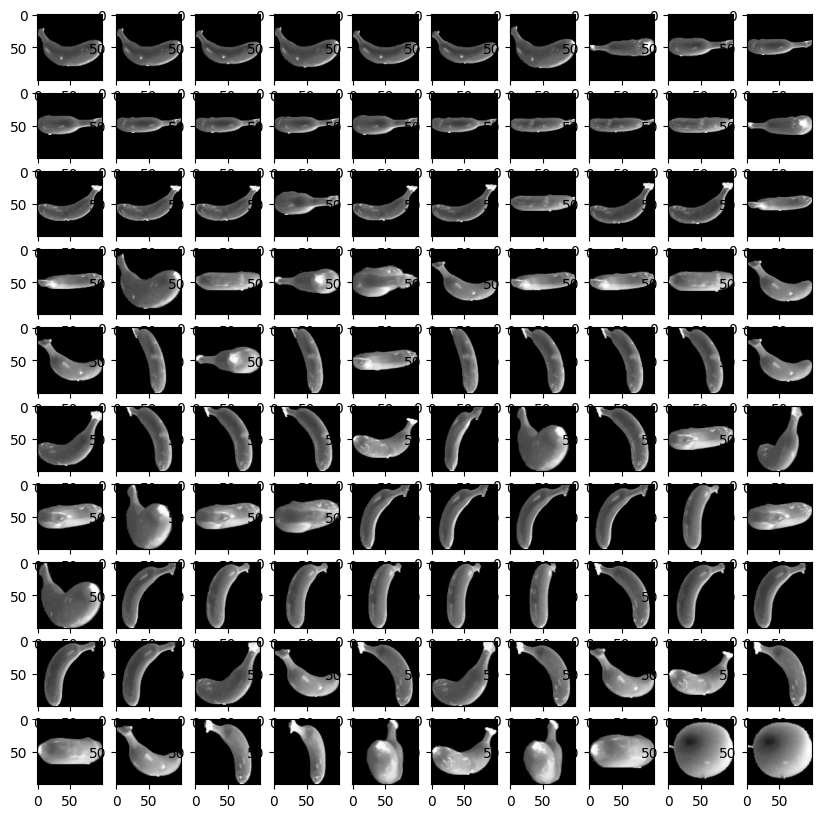

In [45]:
banana_index = np.argsort(abs_mean)[0:100] #오름차순 정렬
#사과와 평균치가 가장 가가운 100개 추출

fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10 + j]], cmap='gray')

plt.show() 

# 사진을 출력하는 코드는 잘 몰라도 됨